# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

This is my work in preparing the data and visualizing it into a dashboard later on. This project is about analyzing the Volume growth of Ethereum Currency.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="description" content="Get Ethereum (ETH) USD historical prices." />\n\n\n<script>(function(w,d,s,l,'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

In [5]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="/favicon.ico" rel="shortcut icon"/>
<link href="/OpensearchDescription.xml" rel="search" type="application/opensearchdescription+xml">
<title>Ethereum USD Historical Data | CoinGecko</title>
<meta content="Get Ethereum (ETH) USD historical prices." name="description">
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
  })(window,document,'script','dataLayer','GTM-NP34MX7');</script>
<link as="font" crossorigin="" href="https://static.coingecko.com/webfonts/fa-solid-900.woff2" rel="preload" type="font/woff2"/>
<link as="font" crossorigin="" 

## Finding the right key to scrap the data & Extracting the right information

In this part, I am finding the key of its elements and putting the key into the `.find()` method.

In [6]:
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:1000])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="text-center">
    $27,149,143,847
   </td>
   <td class="text-center">
    $2,169.40
   </td>
   <td class="text-center">
    N/A
   </td>
  </tr>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-29
   </th>
   <td class="text-center">
    $243,040,539,437
   </td>
   <td class="text-center">
    $30,629,329,806
   </td>
   <td class="text-center">
    $2,087.52
   </td>
   <td class="text-center">
    $2,169.40
   </td>
  </tr>
  <tr>
   <th class="font-semibold text-cente


Finding row length.

In [7]:
row = table.find_all('tr', attrs={'class':''})
row_length = len(row)
row_length

548

In [8]:
row

[<tr>
 <th class="text-center">Date</th>
 <th class="text-center">Market Cap</th>
 <th class="text-center">Volume</th>
 <th class="text-center">Open</th>
 <th class="text-center">Close</th>
 </tr>,
 <tr>
 <th class="font-semibold text-center" scope="row">2021-06-30</th>
 <td class="text-center">
 $253,607,549,372
 </td>
 <td class="text-center">
 $27,149,143,847
 </td>
 <td class="text-center">
 $2,169.40
 </td>
 <td class="text-center">
 N/A
 </td>
 </tr>,
 <tr>
 <th class="font-semibold text-center" scope="row">2021-06-29</th>
 <td class="text-center">
 $243,040,539,437
 </td>
 <td class="text-center">
 $30,629,329,806
 </td>
 <td class="text-center">
 $2,087.52
 </td>
 <td class="text-center">
 $2,169.40
 </td>
 </tr>,
 <tr>
 <th class="font-semibold text-center" scope="row">2021-06-28</th>
 <td class="text-center">
 $229,354,016,311
 </td>
 <td class="text-center">
 $24,316,408,028
 </td>
 <td class="text-center">
 $1,973.93
 </td>
 <td class="text-center">
 $2,087.52
 </td>
 </tr>

This part is the scraping proccess to prepare the dataframe which we will also make it later before visualizing it.

In [9]:
temp = [] #initiating a tuple

for i in range(1, row_length):

    #scraping process
    
    #get date
    date = row[i].th.text
    
    #get volume
    volume = row[i].find_all('td')[1].text
    volume = volume.strip() #remove excess white space or unnecessary characters 
    
    temp.append((date, volume))
temp 

[('2021-06-30', '$27,149,143,847'),
 ('2021-06-29', '$30,629,329,806'),
 ('2021-06-28', '$24,316,408,028'),
 ('2021-06-27', '$24,249,510,321'),
 ('2021-06-26', '$25,981,381,067'),
 ('2021-06-25', '$22,447,489,242'),
 ('2021-06-24', '$28,098,744,045'),
 ('2021-06-23', '$38,755,019,937'),
 ('2021-06-22', '$39,499,960,408'),
 ('2021-06-21', '$26,235,850,447'),
 ('2021-06-20', '$20,456,963,375'),
 ('2021-06-19', '$26,204,484,921'),
 ('2021-06-18', '$25,708,624,827'),
 ('2021-06-17', '$26,150,320,395'),
 ('2021-06-16', '$26,803,957,680'),
 ('2021-06-15', '$28,128,172,338'),
 ('2021-06-14', '$29,382,118,964'),
 ('2021-06-13', '$28,235,882,062'),
 ('2021-06-12', '$26,751,786,966'),
 ('2021-06-11', '$33,075,957,437'),
 ('2021-06-10', '$43,973,432,438'),
 ('2021-06-09', '$48,344,195,674'),
 ('2021-06-08', '$37,385,872,210'),
 ('2021-06-07', '$29,050,162,249'),
 ('2021-06-06', '$34,731,979,705'),
 ('2021-06-05', '$39,996,583,175'),
 ('2021-06-04', '$38,104,663,185'),
 ('2021-06-03', '$39,148,856

In [10]:
temp = temp[::-1] #reorder the date

## Creating data frame & Data wrangling

Putting the array into dataframe

In [11]:
import pandas as pd

df = pd.DataFrame(temp, columns=('Date', 'Volume'))
df.head()

,Date,Volume
0,2020-01-01,"$7,103,187,151"
1,2020-01-02,"$6,623,732,041"
2,2020-01-03,"$6,497,297,884"
3,2020-01-04,"$9,655,245,100"
4,2020-01-05,"$6,958,393,690"


This is the cleaning data part. I change the Date column type into a datetime type and also removing unnecessary characters in the Volume column to later changing it into an numeric column type.

In [12]:
df['Date'] = df['Date'].astype('datetime64')
df['Volume'] = df['Volume'].str.replace('$','')
df['Volume'] = df['Volume'].str.replace(',','')
df['Volume'] = df['Volume'].astype('float64')
df = df.set_index('Date')

df.dtypes

C:\temp/ipykernel_14588/2549832479.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Volume'] = df['Volume'].str.replace('$','')


Volume    float64
dtype: object

Data Visualization. This is the visualization of the data that I've scraped earlier. Let's take a look!

Text(0, 0.5, 'Volume in Dollars')

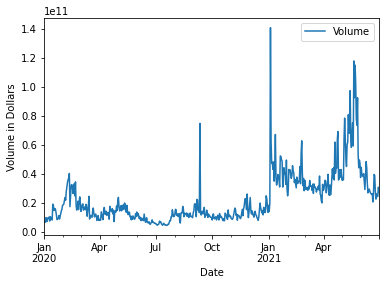

In [13]:
df.plot()

## Finishing This Notebook with Analysis and Conclusion

This is the final form for the data visualisation. 

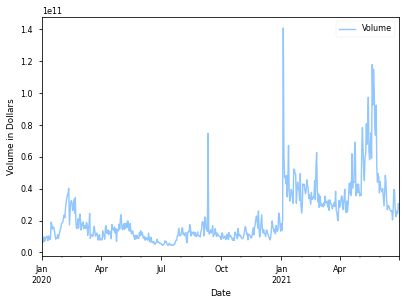

In [31]:
import matplotlib.pyplot as plt
df.plot()
plt.ylabel('Volume in Dollars')
plt.show()

> Conclusion :
The Volume of Ethereum has the biggest number on the January 2021 with the nominal of 140 Billion USD with a mean Volume of 22 Billion USD. On the other side, the flow of the graphic is not changing too much and agressively.